# Life Expectancy GDP - Python Portfolio Project (Data Visualisation)

## Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


### Importing Libraries and Inspecting the Data

In [243]:
# Firstly, we have to import the relevant libraries to assist us in our project.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [244]:
# Seeing all the data we are working with today
all_data = pd.read_csv('all_data.csv')
print(all_data.head())

print(all_data.shape)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
(96, 4)


In [245]:
# Seeing all countries within the data
print(all_data['Country'].unique())

# Seeing all Years within the data
print(all_data['Year'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [246]:
all_data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


### Data Cleaning (Simplifying Column Name)

As we can see the `'Life expectancy at birth (years)'` column name may be a bit redundant to be coded in, we can simplifying the process by changing or shortening the name of the column into `LEABY`.

In [247]:
all_data = all_data.rename({'Life expectancy at birth (years)':'LEABY'}, axis='columns')
all_data.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Extra Information - Power Law

Quoted from Wikipedia (https://en.wikipedia.org/wiki/Power_law)

In statistics, a power law is a functional relationship between two quantities, where a relative change in one quantity results in a proportional relative change in the other quantity, independent of the initial size of those quantities: one quantity varies as a power of another. 

For instance, considering the area of a square in terms of the length of its side, if the length is doubled, the area is multiplied by a factor of four.

This is relevant to the portfolio project today as we are trying to understand the relationship between multiple sets of variables. To further help understanding, we can also visualise the data we have through Exploratory Plots.

Exploring data through plots can sometimes be much more effective, below the distribution of `GDP` is being shown. The distribution of `GDP` in the data is very right skewed where most of the values are on the left-hand side.

<Figure size 864x432 with 0 Axes>

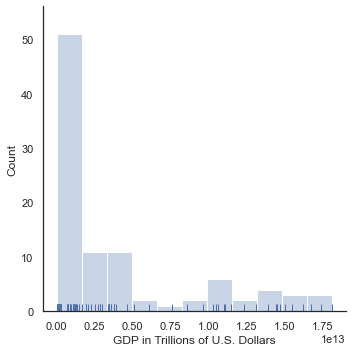

In [248]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.displot(all_data.GDP, rug = True, kde=False, alpha=0.3)
plt.xlabel("GDP in Trillions of U.S. Dollars");

From the distribution below, we can see that the Life expectancy is very left skewed where most of the values are on the right-hand side. This is a contrast as compared to GDP distribution.

<Figure size 864x432 with 0 Axes>

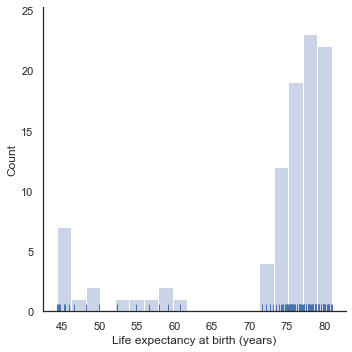

In [249]:
plt.figure(figsize=(12,6))
sns.displot(all_data.LEABY, rug = True, kde=False, alpha=0.3)
plt.xlabel("Life expectancy at birth (years)");

## Data Analysis

### What is the average life expectancy in these nations?

Although Exploratory Plots are useful when trying to understand the distributions of each data, it does not tell us very much about specific information which we are interested in.

Since the previous plots did not break up the data into specific countries, we have to find the average `GDP` and `LEABY` of each country.

Chile has an average GDP of 0.1697 Trillions.
China has an average GDP of 4.9577 Trillions.
Germany has an average GDP of 3.0947 Trillions.
Mexico has an average GDP of 0.9766 Trillions.
United States of America has an average GDP of 14.075 Trillions.
Zimbabwe has an average GDP of 0.0090 Trillions.


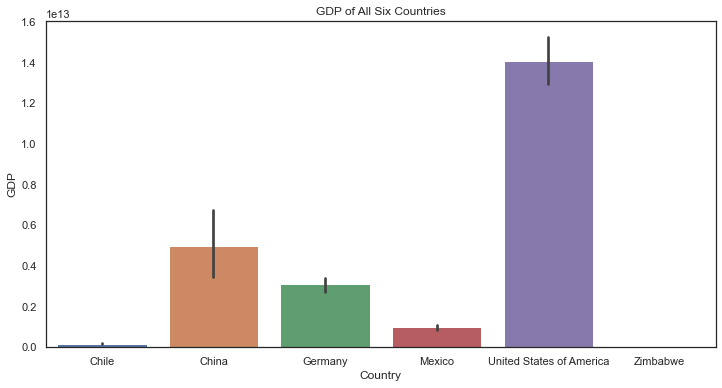

<Figure size 432x288 with 0 Axes>

In [250]:
country = all_data.Country.unique()

for c in country:
    country_GDP_mean = np.mean(all_data.GDP[all_data.Country == c])
    print(c + ' has an average GDP of ' + str(country_GDP_mean/10**12)[:6] + ' Trillions.')
    
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=all_data, x='Country', y='GDP')
plt.title('GDP of All Six Countries')
plt.show()
plt.clf()

Chile has an average Life Expectancy at Birth of 78.9 years.
China has an average Life Expectancy at Birth of 74.2 years.
Germany has an average Life Expectancy at Birth of 79.6 years.
Mexico has an average Life Expectancy at Birth of 75.7 years.
United States of America has an average Life Expectancy at Birth of 78.0 years.
Zimbabwe has an average Life Expectancy at Birth of 50.0 years.


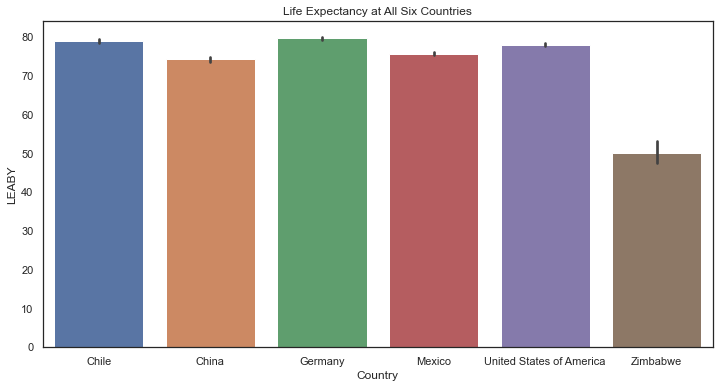

<Figure size 432x288 with 0 Axes>

In [251]:
for c in country:
    country_LEABY_mean = np.mean(all_data.LEABY[all_data.Country == c])
    print(c + ' has an average Life Expectancy at Birth of ' + str(country_LEABY_mean)[:4] + ' years.')
    
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=all_data, x='Country', y='LEABY')
plt.title('Life Expectancy at All Six Countries')
plt.show()
plt.clf()

To visualise between the distribution of `GDP` and `LEABY` data of all countries specifically, we can use a swarmplot to do so.

C:\Users\yanwe\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


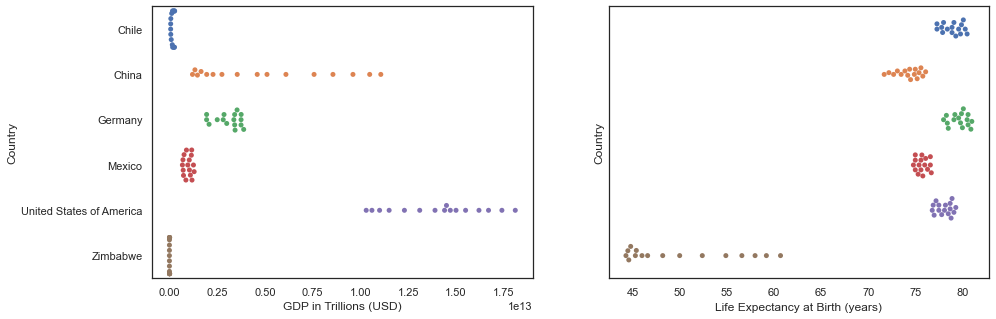

In [252]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.swarmplot(ax=axes[0], x=all_data.GDP, y=all_data.Country)
axes[0].set_xlabel('GDP in Trillions (USD)')
axes[1] = sns.swarmplot(ax=axes[1], x=all_data.LEABY, y=all_data.Country)
axes[1].set_xlabel('Life Expectancy at Birth (years)');

We can also display this finding in a table as shown below:

In [253]:
all_data_means = all_data.drop('Year', axis=1).groupby('Country').mean().reset_index()
all_data_means

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


#### Verdict for 'What is the average life expectancy in these nations?'
We can see that most countries share a similar range of life expectancy, such as Chile, China, Germany, Mexico and USA.

Zimbabwe is the only country that shows a lower average life expectancy of 50.

### Has life expectancy increased over time in the six nations?

Has life expectancy increase over time in the six nations?

To answer this, it will be good if we are able to plot a linear graph that describes this across all six nations.

So the task will be to plot 'Life expectancy vs. Year' for all six nations.

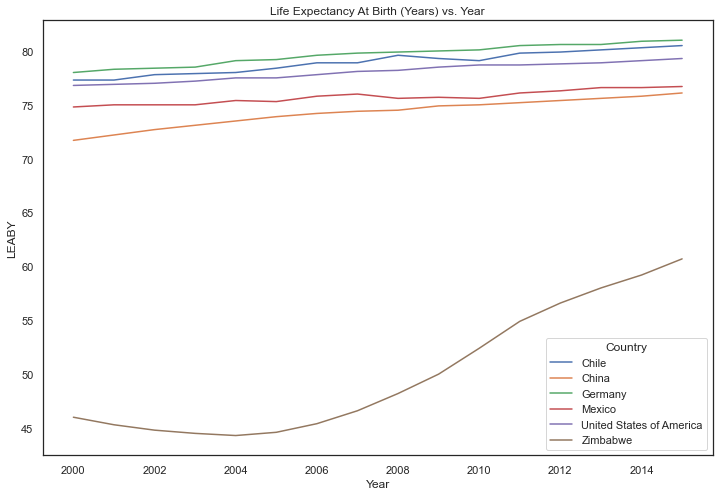

<Figure size 432x288 with 0 Axes>

In [254]:
plt.figure(figsize=(12,8))
sns.lineplot(data=all_data, x='Year', y='LEABY', hue='Country')
plt.title('Life Expectancy At Birth (Years) vs. Year')
plt.show()
plt.clf()

To look more indepth into this, we can then plot multiple individual plots to make it even easier to compare between the `LEABY` data. This will eliminate any magnitude of influence in visualisations of other country's data.

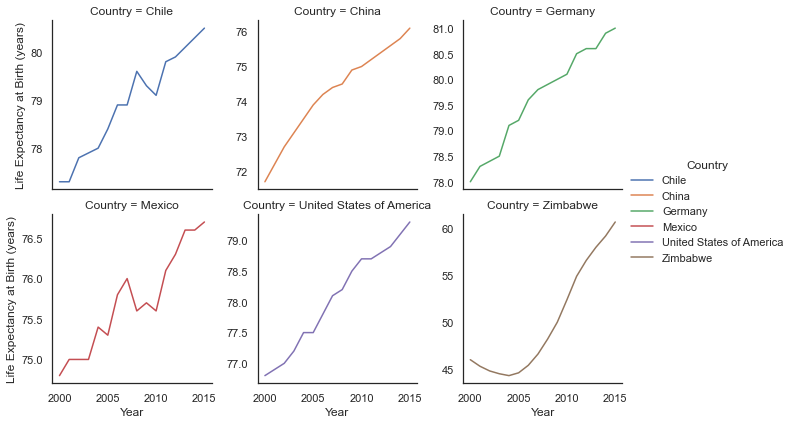

In [255]:
plotLEABY = sns.FacetGrid(all_data, col='Country', col_wrap=3, hue='Country', sharey=False)

plotLEABY = (plotLEABY.map(sns.lineplot, 'Year', 'LEABY').add_legend().set_axis_labels('Year', 'Life Expectancy at Birth (years)'))
           
plotLEABY;

#### Verdict for 'Has life expectancy increase over time in the six nations?'

Yes, it has as shown by the up-trend in the plotted chart from Year 2000 to 2015.

By separating the chart into multiple individual plots, we are able to better understand the trend experienced by all six different nations. We can see a steady uptrend in all countries. Although a small dip can be noticed in Chile, Mexico and Zimbabwe.

### Has GDP increased over time in the six nations?

To answer and visualise this, we can simply plot a similar chart to the previous question, but instead of 'Life expectancy at birth', we will plot 'GDP' instead.

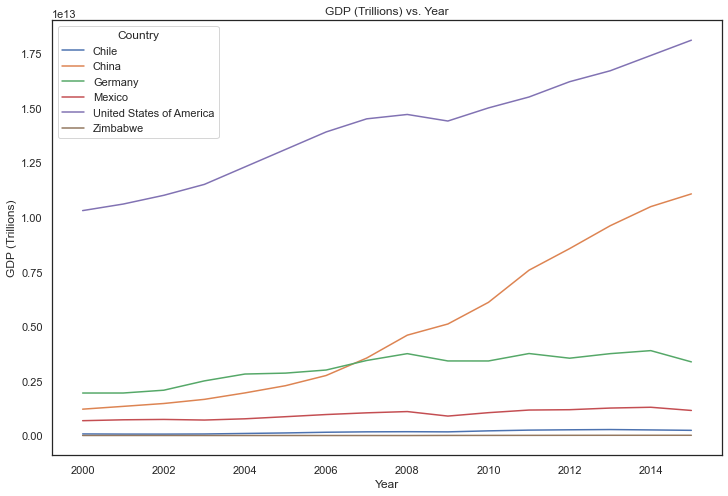

<Figure size 432x288 with 0 Axes>

In [256]:
f, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=all_data, x='Year', y='GDP', hue='Country')
ax.set_ylabel('GDP (Trillions)')
plt.title('GDP (Trillions) vs. Year')
plt.show()
plt.clf()

Countries like China and United States of America have seen its GDP grew throughout the years. However, this same conclusion cannot be shared with the other four countries, where GDP has been flattened through the years. However, this may be due to influence of other nations due to the Data Visualisation method.

To look more indepth into this, we can then plot multiple individual plots to make it even easier to compare between the `GDP` data. This will eliminate any magnitude of influence in visualisations of other country's data.

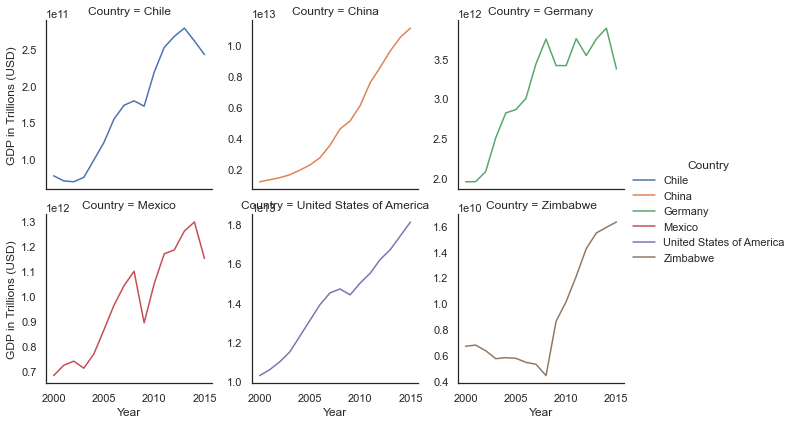

In [257]:
plotGDP = sns.FacetGrid(all_data, col='Country', col_wrap=3, hue='Country', sharey=False)

plotGDP = (plotGDP.map(sns.lineplot, 'Year', 'GDP').add_legend().set_axis_labels('Year', 'GDP in Trillions (USD)'))
           
plotGDP;

#### Verdict for 'Has GDP increased over time in the six nations?'

In this multiple individual plots, we can see that both China and USA are experiencing a strong uptrend in terms of GDP growth from 2000 to 2015, but this is not shared between the other nations. Where the other countries experienced periods of decline and consolidation.

Chile, Germany and Mexico experienced an overall GDP increase from 2000 to 2015, but at recent years of 2013 to 2015, they are at a decline in GDP. In addition to this, we can see that the GDP of Germany seems to be consolidating around the 3.5 Trillion region and has not grown since 2008. This stagnant growth might be an effect from the 2008 Global Financial Crisis.

Zimbabwe experienced a decline from 2000 to 2008 before a dramatic sharp rise that propelled it upwards in terms of GDP. 

### Extra Information - Pearson Correlation Coefficient

As quoted from Wikipedia (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In statistics, the Pearson correlation coefficient (PCC, pronounced /ˈpɪərsən/) ― also known as Pearson's r, the Pearson product-moment correlation coefficient (PPMCC), the bivariate correlation or colloquially simply as the correlation coefficient ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. 

As a simple example, one would expect the age and height of a sample of teenagers from a high school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation).


### Is there a correlation between GDP and life expectancy of a country?

Since time is out of the equation right now, we can plot a chart that shows GDP and Life expectancy of each countries. Besides that we can also calculate the Pearson correlation coefficient to test the correlation between `GDP` and `LEABY`.

Chile has a Life Expectancy to GDP Pearson correlation coefficient of 0.9498766659254416
China has a Life Expectancy to GDP Pearson correlation coefficient of 0.9085255408648358
Germany has a Life Expectancy to GDP Pearson correlation coefficient of 0.9326988982561268
Mexico has a Life Expectancy to GDP Pearson correlation coefficient of 0.9322377167847081
United States of America has a Life Expectancy to GDP Pearson correlation coefficient of 0.9817092382430257
Zimbabwe has a Life Expectancy to GDP Pearson correlation coefficient of 0.9661998955858777


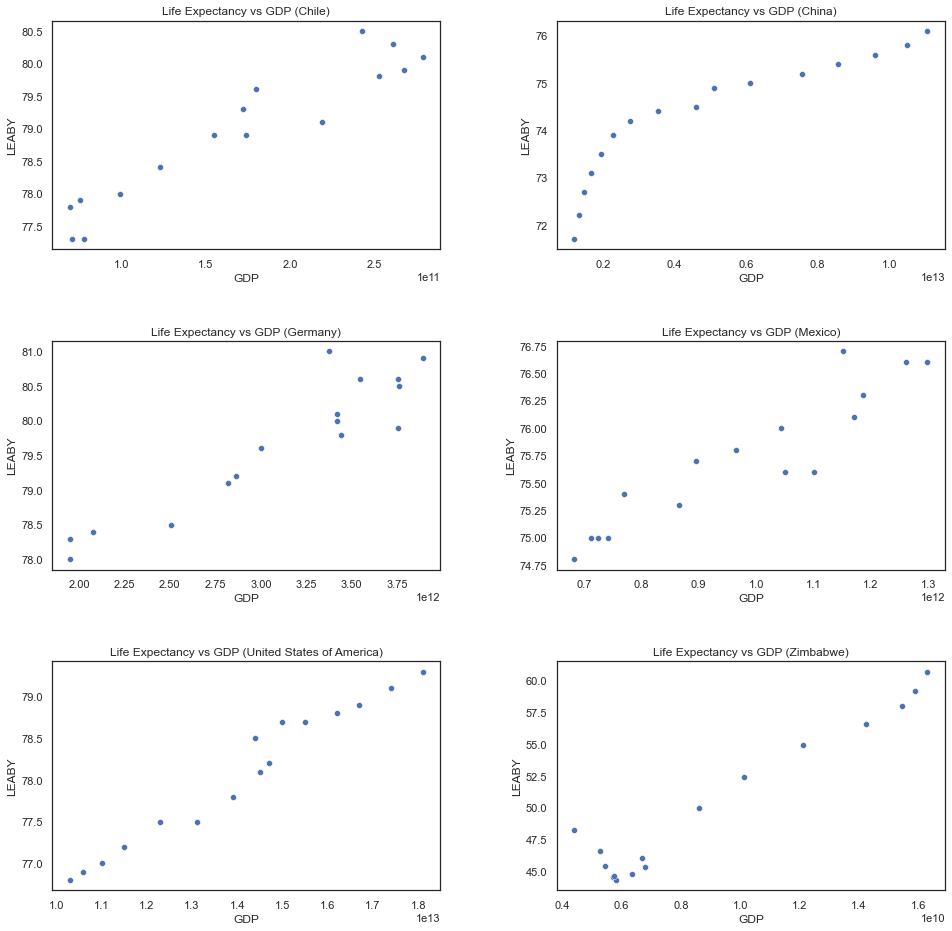

<Figure size 432x288 with 0 Axes>

In [258]:
from scipy.stats import pearsonr

for c in country:
    corr_life_gdp, p = pearsonr(all_data['LEABY'][all_data.Country == c], all_data['GDP'][all_data.Country == c])
    print(c + ' has a Life Expectancy to GDP Pearson correlation coefficient of ' + str(corr_life_gdp))
    
f = plt.figure(figsize=(16, 16))
ax = plt.subplot(3, 2, 6)
for c, country in zip(range(1, 7), country):
    axis = plt.subplot(3,2,c)
    sns.scatterplot(data=all_data[all_data.Country == country], x='GDP', y='LEABY')
    plt.title('Life Expectancy vs GDP (' + str(country) + ')')
    
plt.subplots_adjust(wspace=.3, hspace=.4)
plt.show()
plt.clf()

#### Verdict for 'Is there a correlation between GDP and life expectancy of a country?'

Overall, we can see an uptrend in Life expectancy against GDP. In other words, as GDP grows, Life Expectancy increases.

The near 1 Pearson correlation coefficients of all country also further support this point.

## Conclusions

Although verdicts were made between each sections above, I think it will be helpful to also conclude it again here.

- What is the distribution of that life expectancy?
    - The life expectancy had a left skew, or most of the observations were on the right side.
- What is the average life expectancy in these nations?
    - We can see that most countries share a similar range of life expectancy, such as Chile, China, Germany, Mexico and USA. Zimbabwe is the only country that shows a lower average life expectancy of 50.
- Has life expectancy increased over time in the six nations?
    - Yes, we can see a steady uptrend in all countries. Although a small dip can be noticed in Chile, Mexico and Zimbabwe.
- Has GDP increased over time in the six nations?
    - Yes, we can see that both China and USA are experiencing a strong uptrend in terms of GDP growth from 2000 to 2015, but this is not shared between the other nations. Where the other countries experienced periods of decline and consolidation.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes, there is a strong positive correlation between GDP and life expectancy for countries in our list.
